# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

1) Sex ratio in the population is almost equal
2)Capomulin and Ramicane are more effective than Infubinol and Ceftamin in reducing the tumor size.
3) Weight of the Mice and the tumor volume have a positive correlation and as the wight increases the tumor volume increases as well.


In [212]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single dataset

complete = pd.merge(mouse_metadata, study_results)
new = ["Mouse ID","Timepoint", "Tumor Volume (mm3)", "Metastatic Sites", "Drug Regimen", "Sex",\
                     "Age_months", "Weight (g)"]
complete = complete.reindex(columns = new)
complete = complete.sort_values(["Mouse ID", "Timepoint"], ignore_index= False)
# Display the data table for preview
complete.head(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
454,a203,0,45.000000,0,Infubinol,Female,20,23
455,a203,5,48.508468,0,Infubinol,Female,20,23
456,a203,10,51.852437,1,Infubinol,Female,20,23
457,a203,15,52.777870,1,Infubinol,Female,20,23
458,a203,20,55.173336,1,Infubinol,Female,20,23
459,a203,25,56.793208,1,Infubinol,Female,20,23
460,a203,30,59.523197,1,Infubinol,Female,20,23
461,a203,35,61.931650,2,Infubinol,Female,20,23
462,a203,40,63.593490,2,Infubinol,Female,20,23
463,a203,45,67.973419,2,Infubinol,Female,20,23


In [190]:
# Checking the number of mice.
complete["Mouse ID"].nunique()

249

In [191]:
duplicates = complete.duplicated(subset=["Mouse ID", "Timepoint"])


In [192]:
find = complete[["Mouse ID","Timepoint"]]
duplicates = complete.loc[complete.duplicated(subset=["Mouse ID", "Timepoint"], keep = False), :]
indexes = duplicates.index
duplicates.head(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
908,g989,0,45.000000,0,Propriva,Female,21,26
909,g989,0,45.000000,0,Propriva,Female,21,26
910,g989,5,48.786801,0,Propriva,Female,21,26
911,g989,5,47.570392,0,Propriva,Female,21,26
912,g989,10,51.745156,0,Propriva,Female,21,26
913,g989,10,49.880528,0,Propriva,Female,21,26
914,g989,15,51.325852,1,Propriva,Female,21,26
915,g989,15,53.442020,0,Propriva,Female,21,26
916,g989,20,55.326122,1,Propriva,Female,21,26
917,g989,20,54.657650,1,Propriva,Female,21,26


In [193]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean = complete.drop(indexes)
clean.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
454,a203,0,45.000000,0,Infubinol,Female,20,23
455,a203,5,48.508468,0,Infubinol,Female,20,23
456,a203,10,51.852437,1,Infubinol,Female,20,23
457,a203,15,52.777870,1,Infubinol,Female,20,23
458,a203,20,55.173336,1,Infubinol,Female,20,23


In [194]:
# Checking the number of mice in the clean DataFrame.
clean["Mouse ID"].nunique()

249

## Summary Statistics

In [195]:
mean = complete.groupby(["Drug Regimen"]).mean()
median = complete.groupby(["Drug Regimen"]).median()
var = complete.groupby(["Drug Regimen"]).var()
std = complete.groupby(["Drug Regimen"]).std()
sem = complete.groupby(["Drug Regimen"]).sem()
summary = pd.DataFrame()
summary["Mean Tumor Volume"] = mean["Tumor Volume (mm3)"]
summary["Median Tumor Volume"] = median["Tumor Volume (mm3)"]
summary["Tumor Volume Variance"] = var["Tumor Volume (mm3)"]
summary["Tumor Volume Std. Dev."] = std["Tumor Volume (mm3)"]
summary["Tumor Volume Std. Err."] = sem["Tumor Volume (mm3)"]
summary.head(10)


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [196]:
aggregated = complete.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean", "median", "var","std","sem"]})
aggregated.head()
                                                

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466

## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice Tested')

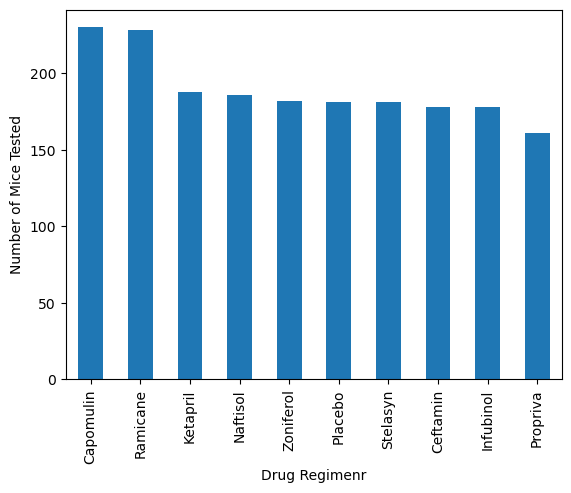

In [197]:
grouped_count = complete.groupby(["Drug Regimen"]).count()
sorted = grouped_count.sort_values(by = ["Mouse ID"], ascending= False)
sorted.apply(["Mouse ID"], axis=1).plot(kind="bar", legend=False)
plt.xlabel("Drug Regimenr")
plt.ylabel("Number of Mice Tested")

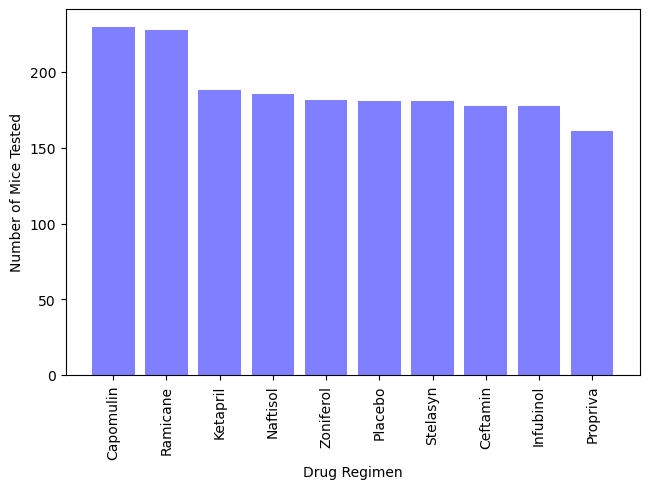

In [198]:
grouped_count = complete.groupby("Drug Regimen", as_index= False).count()
sorted = grouped_count.sort_values(by = ["Mouse ID"], ascending= False)
plt.bar(sorted["Drug Regimen"], sorted["Mouse ID"], color='b', alpha=0.5)
plt.xticks( rotation="vertical")
plt.tight_layout()
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Age_months,Weight (g),Sex
Sex,,,,,,,,
Female,935,935,935,935,935,935,935,935
Male,958,958,958,958,958,958,958,958


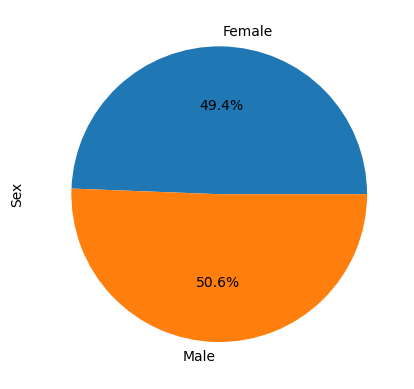

In [199]:
grouped_sex = complete.groupby(["Sex"]).count()
grouped_sex["Sex"]=grouped_sex["Mouse ID"]
grouped_sex.plot.pie(y="Sex", autopct='%1.1f%%', legend=False)
grouped_sex

Text(0.5, 1.0, 'Sex')

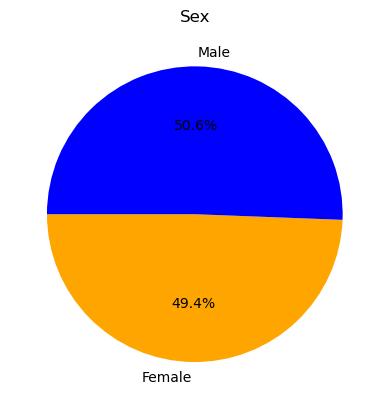

In [200]:
labels = ["Female", "Male"]
sizes = grouped_sex["Sex"]
colors = ["orange", "blue"]
plt.pie(sizes,labels=labels, colors=colors, autopct="%1.1f%%", startangle=180)
plt.title("Sex")

## Quartiles, Outliers and Boxplots

In [201]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
sorted_mouse = complete.sort_values(by = ["Timepoint"])
filtered = sorted_mouse.loc[(sorted_mouse["Drug Regimen"]=="Capomulin") | (sorted_mouse["Drug Regimen"]=="Ramicane")\
                            | (sorted_mouse["Drug Regimen"]=="Infubinol")| (sorted_mouse["Drug Regimen"]=="Ceftamin"), :]
mouse = filtered.groupby(["Mouse ID","Drug Regimen"], as_index= False).last()
mouse.head(20)

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
0,a203,Infubinol,45,67.973419,2,Female,20,23
1,a251,Infubinol,45,65.525743,1,Female,21,25
2,a275,Ceftamin,45,62.999356,3,Female,20,28
3,a411,Ramicane,45,38.407618,1,Male,3,22
4,a444,Ramicane,45,43.047543,0,Female,10,25
5,a520,Ramicane,45,38.810366,1,Male,13,21
6,a577,Infubinol,30,57.031862,2,Female,6,25
7,a644,Ramicane,45,32.978522,1,Female,7,17
8,a685,Infubinol,45,66.083066,3,Male,8,30
9,b128,Capomulin,45,38.982878,2,Female,9,22


In [211]:
# Put treatments into a list for for loop (and later for plot labels)
#Drug_Regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = mouse["Tumor Volume (mm3)"]

Capomulin = mouse.loc[mouse["Drug Regimen"] == "Capomulin",:]
Ramicane = mouse.loc[mouse["Drug Regimen"] == "Ramicane",:]
Infubinol = mouse.loc[mouse["Drug Regimen"] == "Infubinol",:]
Ceftamin = mouse.loc[mouse["Drug Regimen"] == "Ceftamin",:]
Drug_Regimens = [Capomulin, Ramicane, Infubinol, Ceftamin]
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = [drug["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75]) for drug in Drug_Regimens]
lowerq =[(quartiles[0.25] for tumor in quartiles)]
upperq = [(quartiles[0.75] for tumor in quartiles)]
iqr =[(upperq-lowerq for tumor in quartiles)]

lower_bound =[( lowerq - (1.5*iqr)for drug in Drug_Regimens)]
upper_bound = [(upperq + (1.5*iqr)for drug in Drug_Regimens)]
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    # add subset 
outliers = [] 

    
    # Determine outliers using upper and lower bounds
quartiles


[0.25    32.377357
 0.50    38.125164
 0.75    40.159220
 Name: Tumor Volume (mm3), dtype: float64,
 0.25    31.560470
 0.50    36.561652
 0.75    40.659006
 Name: Tumor Volume (mm3), dtype: float64,
 0.25    54.048608
 0.50    60.165180
 0.75    65.525743
 Name: Tumor Volume (mm3), dtype: float64,
 0.25    48.722078
 0.50    59.851956
 0.75    64.299830
 Name: Tumor Volume (mm3), dtype: float64]

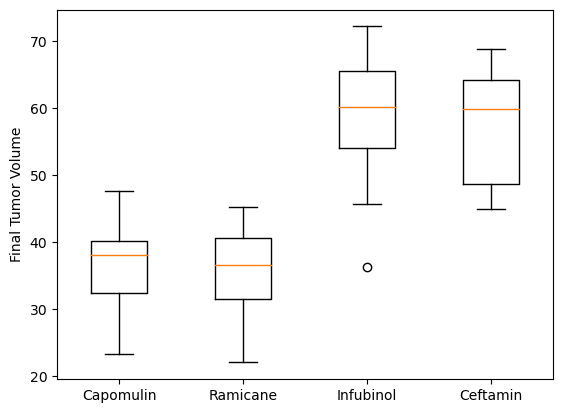

In [203]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
Drugs = [Capomulin["Tumor Volume (mm3)"], Ramicane["Tumor Volume (mm3)"], Infubinol["Tumor Volume (mm3)"],\
         Ceftamin["Tumor Volume (mm3)"]]
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume')
ax1.boxplot(Drugs)
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

plt.show()

## Line and Scatter Plots

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
380,l509,45,41.483008,3,Capomulin,Male,17,21
379,l509,40,40.770813,2,Capomulin,Male,17,21
378,l509,35,40.207288,2,Capomulin,Male,17,21
377,l509,30,44.708055,2,Capomulin,Male,17,21
376,l509,25,44.006257,2,Capomulin,Male,17,21


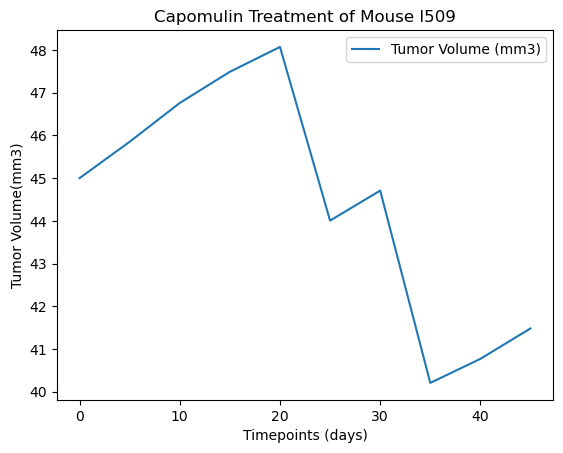

In [204]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
sorted_cap = complete.sort_values(by = ["Timepoint"], ascending= False)
cap = sorted_cap.loc[(sorted_cap["Drug Regimen"]=="Capomulin") &( sorted_cap["Mouse ID"]=="l509" ), :]
cap.plot( 'Timepoint' , 'Tumor Volume (mm3)' )
plt.title("Capomulin Treatment of Mouse l509")
plt.xlabel("Timepoints (days)")
plt.ylabel("Tumor Volume(mm3)")
cap.head()

Text(0, 0.5, 'Average Tumor Volume(mm3)')

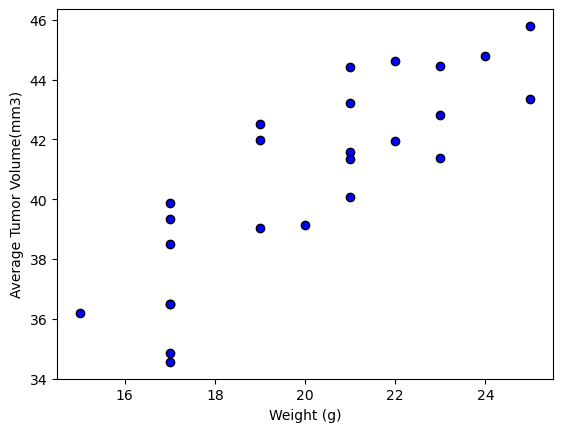

In [209]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
weight = complete.loc[(complete["Drug Regimen"]=="Capomulin") , :]
weight = weight.groupby(["Weight (g)","Mouse ID"], as_index= False).mean()
plt.scatter(weight["Weight (g)"], weight["Tumor Volume (mm3)"], marker="o", facecolors="blue", edgecolors="black")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume(mm3)")

## Correlation and Regression

The correlation between both factors is 0.84
The r-squared is: 0.7088568047708721


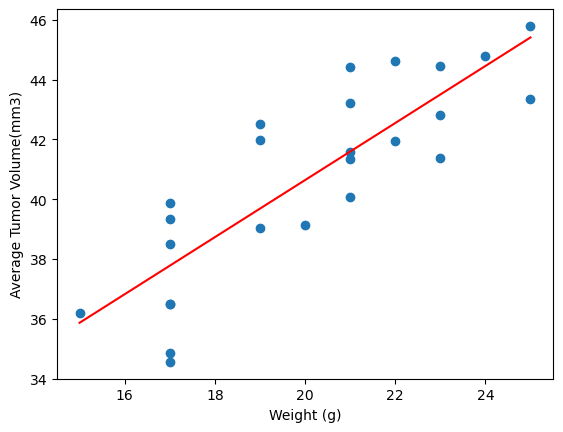

In [213]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(weight["Weight (g)"],weight["Tumor Volume (mm3)"])
print(f"The correlation between both factors is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight["Weight (g)"],weight["Tumor Volume (mm3)"])
regress_values = weight["Weight (g)"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight["Weight (g)"],weight["Tumor Volume (mm3)"])
plt.plot(weight["Weight (g)"],regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel('Average Tumor Volume(mm3)')
print(f"The r-squared is: {rvalue**2}")
plt.show()